In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import c, e
from uncertainties import ufloat

In [71]:
LAMBDA = np.array([405, 465 , 505 , 590, 625]) * 10**(-9)
U      = np.array([1.4, 1.25, 0.85, 0.2, 0.15])
F      = [c/l for l in LAMBDA]

h = (8.526+/-1.285)E-34
A = (2.387+/-0.482)E+00 [eV]
h/e = (5.322+/-0.802)E-15
nu_g = (4.486+/-1.130)E+14


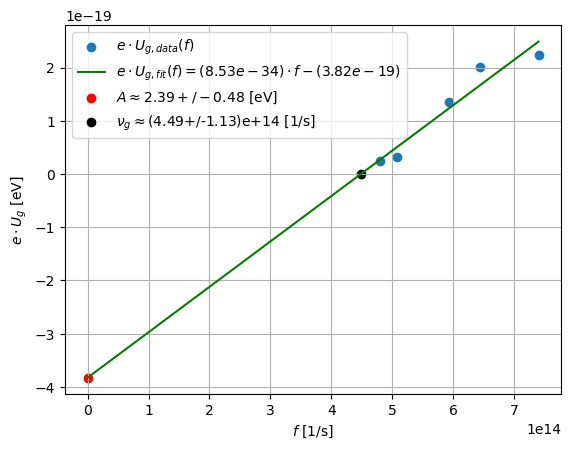

In [115]:
fit_function = lambda f,h,A: h*f - A 
fit, cov = curve_fit(fit_function, F, e*U, sigma=[0.1]*len(U))

h = ufloat(fit[0], cov[0,0]**0.5)
A = ufloat(fit[1], cov[1,1]**0.5)

print(f"{h = :.3E}\nA = {A/e:.3E} [eV]\nh/e = {h/e:.3E}\nnu_g = {A/h:.3E}")

X = np.linspace(0, max(F), 200)
Y = [fit_function(x,*fit) for x in X]

plt.scatter(F,e*U,label=r"$e\cdot U_{g,data}(f)$")
plt.plot(X,Y,label=f"$e\\cdot U_{{g,fit}}(f)=({fit[0]:.3})\\cdot f - ({fit[1]:.3})$",c="g")
plt.scatter(0,-A.n, label=f"$A\\approx {A/e:.3}$ [eV]",c="r")
plt.scatter((A/h).n,0, label=f"$\\nu_g\\approx${A/h:.3} [1/s]",c="black")

plt.legend()
plt.axis()
plt.xlabel(r"$f\ [1/\mathrm{s}]$")
plt.ylabel(r"$e\cdot U_g\ [\mathrm{eV}]$")
plt.grid()
plt.show()

In [97]:
print(fit)
print(cov**0.5)


[8.52619227e-34 3.82471338e-19]
[[1.28464768e-34 3.12905074e-27]
 [3.12905074e-27 7.71705277e-20]]
